In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Informações do dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

- Sem valores nulos
- Muitos dados categóricos

#### Valores duplicados

In [6]:
train.duplicated().sum()

0

Sem valores duplicados

##### Nomes das colunas todas em minúsculo

In [7]:
train = train.rename(columns=str.lower)

### Distribuição dos dados

<AxesSubplot:xlabel='gender', ylabel='count'>

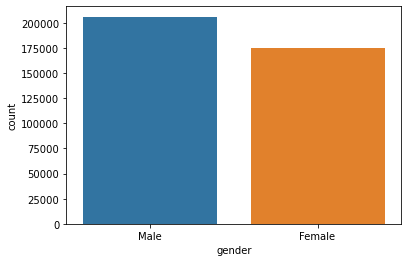

In [9]:
sns.countplot(data = train, x = 'gender')

<AxesSubplot:xlabel='age', ylabel='count'>

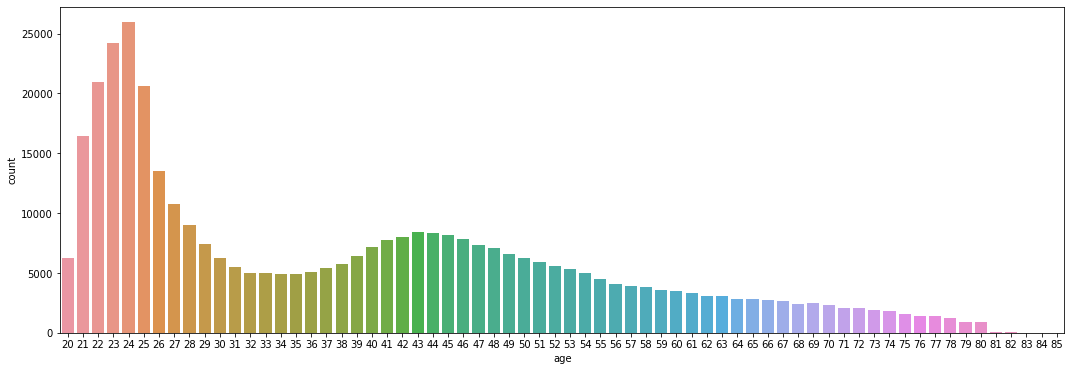

In [10]:
plt.subplots(figsize=(18,6))   
sns.countplot(data = train, x = 'age')

Maior número de pessoas de 21 a 26 anos

<AxesSubplot:xlabel='driving_license', ylabel='count'>

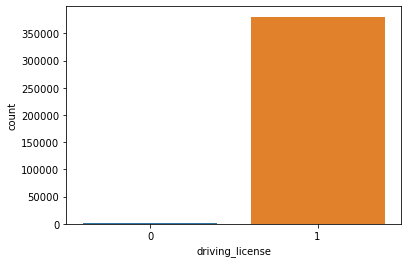

In [11]:
sns.countplot(data = train, x = 'driving_license')

In [12]:
train[train['driving_license'] == 0]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
563,564,Male,69,0,33.0,0,1-2 Year,Yes,39730.0,26.0,53,0
1061,1062,Male,71,0,3.0,0,1-2 Year,No,25323.0,26.0,179,0
1761,1762,Female,58,0,28.0,0,1-2 Year,Yes,53047.0,122.0,214,0
1990,1991,Male,66,0,8.0,0,1-2 Year,No,48063.0,25.0,231,0
2365,2366,Female,52,0,45.0,1,1-2 Year,No,33283.0,26.0,152,0
...,...,...,...,...,...,...,...,...,...,...,...,...
379869,379870,Male,65,0,8.0,0,> 2 Years,Yes,42230.0,26.0,65,0
380088,380089,Male,67,0,16.0,0,> 2 Years,Yes,28195.0,124.0,122,0
380537,380538,Male,57,0,28.0,0,1-2 Year,Yes,48647.0,122.0,144,0
380599,380600,Male,67,0,11.0,1,1-2 Year,No,36953.0,26.0,135,0


Há poucas pessoas que não possuem carteira de motorista

<AxesSubplot:xlabel='region_code', ylabel='count'>

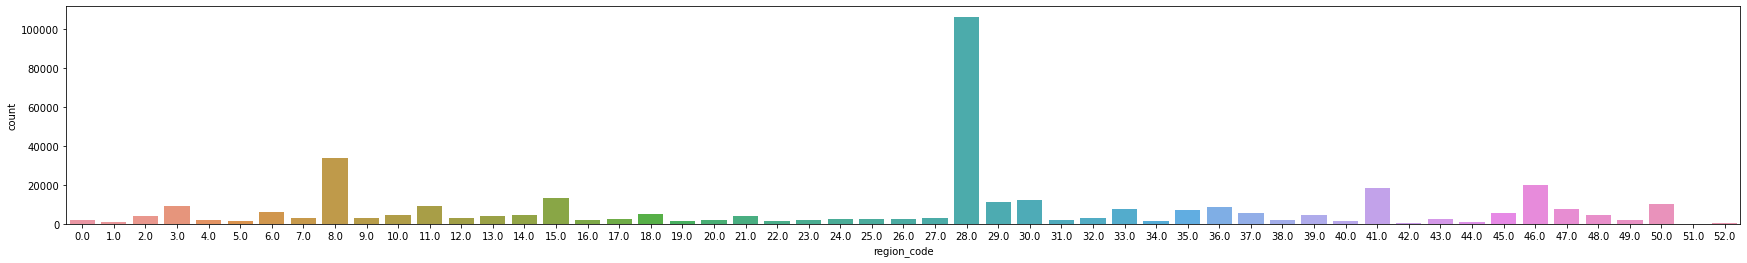

In [13]:
plt.subplots(figsize=(30,4))   
sns.countplot(data = train, x = 'region_code')

Concentração maior de pessoas na região 28.0

<AxesSubplot:xlabel='previously_insured', ylabel='count'>

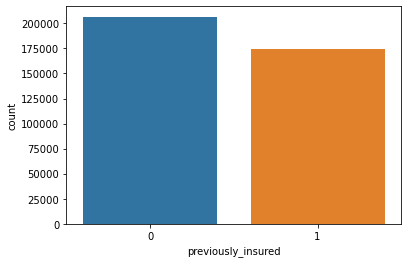

In [14]:
sns.countplot(data = train, x = 'previously_insured')

<AxesSubplot:xlabel='vehicle_age', ylabel='count'>

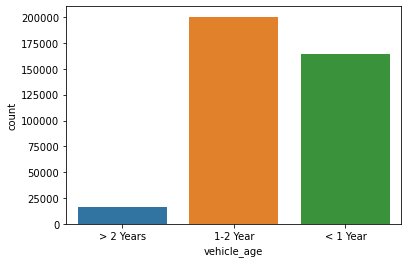

In [15]:
sns.countplot(data = train, x = 'vehicle_age')

Não há muita representatividade de pessoas que possuem carros com mais de 2 anos

<AxesSubplot:xlabel='vehicle_damage', ylabel='count'>

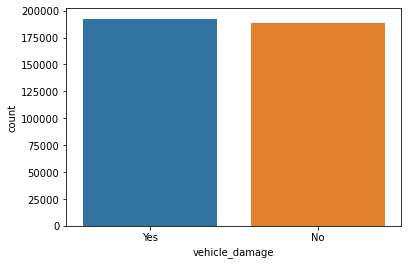

In [16]:
sns.countplot(data = train, x = 'vehicle_damage')

<AxesSubplot:xlabel='response', ylabel='count'>

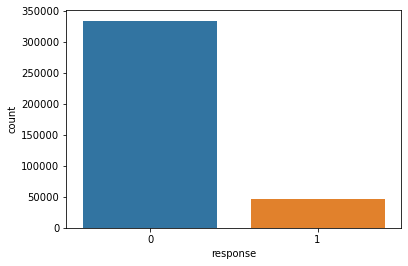

In [17]:
sns.countplot(data = train, x = 'response')

Dataset desbalanceado, muitas pessoas que não estão interessadas no seguro comparadas com pessoas que estão.

### Outliers

<AxesSubplot:xlabel='age'>

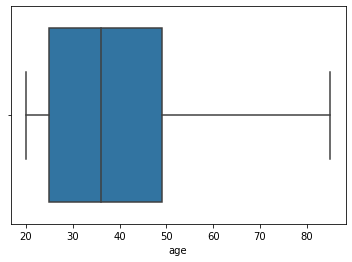

In [18]:
sns.boxplot(x=train["age"])

<AxesSubplot:xlabel='annual_premium'>

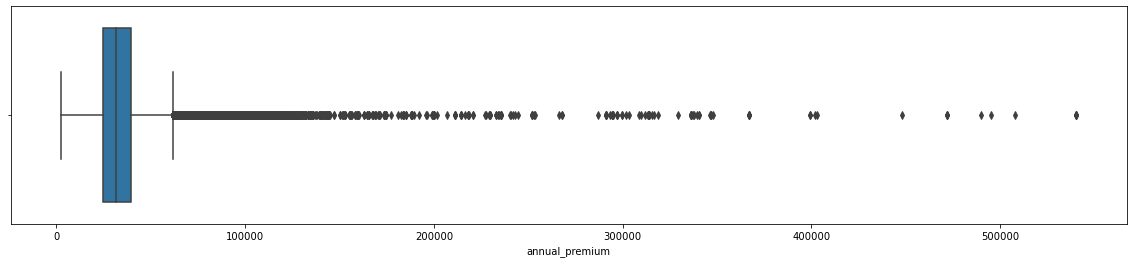

In [19]:
plt.subplots(figsize=(20,4))
sns.boxplot(x=train["annual_premium"])

Há outliers no valor que as pessoas pagam pelo seguro. Precisam ser tratados.

<AxesSubplot:xlabel='vintage'>

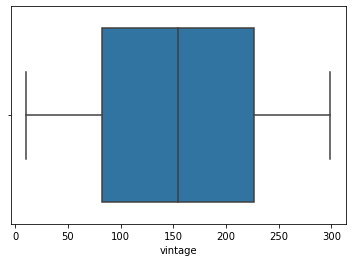

In [20]:
sns.boxplot(x=train["vintage"])

#### Removendo Outliers

As linhas que têm outliers em relação ao preço do seguro serão retiradas

In [21]:
mean = np.mean(train['annual_premium'])
std = np.std(train['annual_premium'])

In [22]:
train[train['annual_premium'] > mean + 2 * std]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
167,168,Female,26,1,8.0,0,< 1 Year,Yes,89282.0,152.0,101,0
176,177,Male,25,1,28.0,1,< 1 Year,No,101021.0,152.0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380815,380816,Female,32,1,28.0,1,< 1 Year,No,91305.0,152.0,183,0
380860,380861,Female,64,1,28.0,0,1-2 Year,Yes,71661.0,26.0,29,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


Valores que serão retirados

In [23]:
train = train[train['annual_premium'] < mean + 2 * std]

<AxesSubplot:xlabel='annual_premium'>

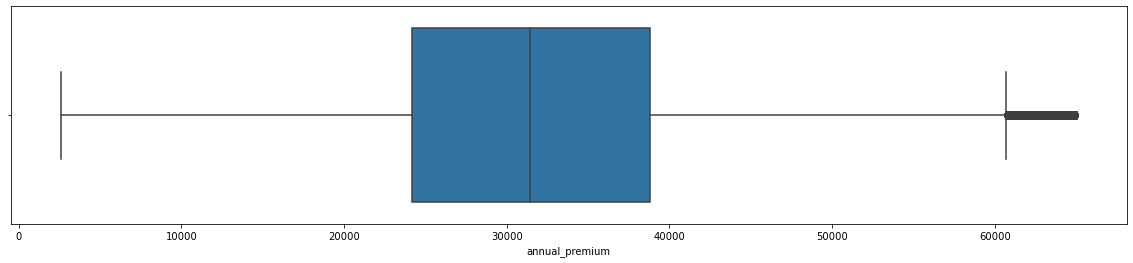

In [24]:
plt.subplots(figsize=(20,4))
sns.boxplot(x=train["annual_premium"])

Boxplot sem os outliers

### Transformando os dados

In [25]:
train['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [26]:
datamapping_vehicle_age = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

In [27]:
train['vehicle_age_num'] = train['vehicle_age'].map(datamapping_vehicle_age)

In [28]:
datamapping_vehicle_demage = {
    'Yes': 1,
    'No': 0
}

In [29]:
train['vehicle_damage_num'] = train['vehicle_damage'].map(datamapping_vehicle_demage)

In [30]:
datamapping_gender = {
    'Male': 0,
    'Female':1
}

In [31]:
train['gender_num'] = train['gender'].map(datamapping_gender)

In [32]:
train

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,1,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,1,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1,0,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,0,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,0,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2,1,1


<AxesSubplot:>

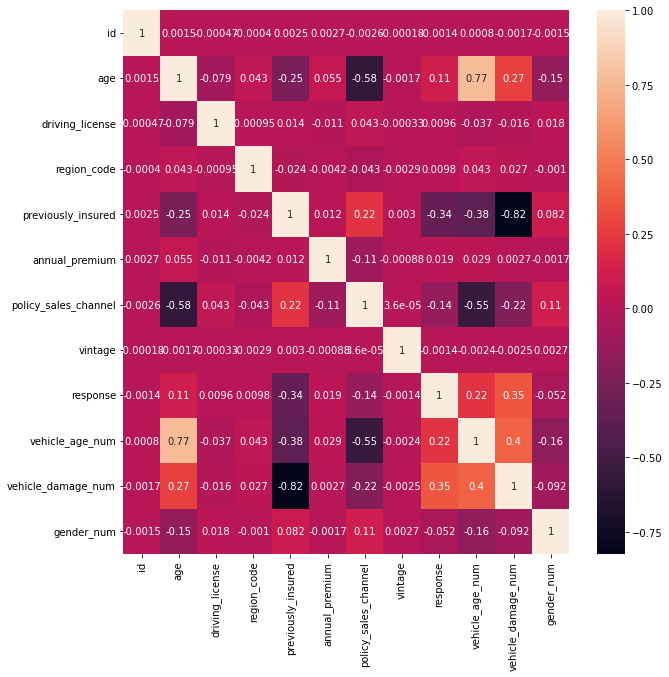

In [33]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(train.corr(), annot=True, ax=ax)

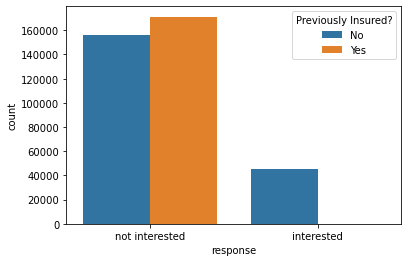

In [34]:
ax = sns.countplot(data = train, x = 'response', hue = 'previously_insured')
ax.set_xticklabels(['not interested', 'interested'])
plt.legend(title = "Previously Insured?", labels=['No', 'Yes'])

No geral as pessoas não estão interessadas no seguro, porém, aquelas que estão, em sua maioria não tiveram seguro previamente

In [35]:
train[(train['response'] == 1) & (train['previously_insured'] == 1)]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num
4799,4800,Male,21,1,3.0,1,< 1 Year,Yes,21641.0,160.0,178,1,0,1,0
5500,5501,Male,43,1,39.0,1,1-2 Year,No,31557.0,154.0,261,1,1,0,0
5849,5850,Female,48,1,28.0,1,1-2 Year,Yes,36508.0,26.0,248,1,1,1,1
7620,7621,Female,42,1,11.0,1,1-2 Year,No,32633.0,124.0,226,1,1,0,1
8118,8119,Female,33,1,28.0,1,< 1 Year,No,2630.0,1.0,87,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370231,370232,Female,25,1,14.0,1,< 1 Year,Yes,21802.0,152.0,231,1,0,1,1
371601,371602,Female,25,1,41.0,1,< 1 Year,No,25359.0,152.0,107,1,0,0,1
374872,374873,Female,29,1,46.0,1,1-2 Year,Yes,24166.0,157.0,149,1,1,1,1
378838,378839,Male,38,1,28.0,1,1-2 Year,No,20624.0,26.0,182,1,1,0,0


[Text(0, 0, 'not interested'), Text(1, 0, 'interested')]

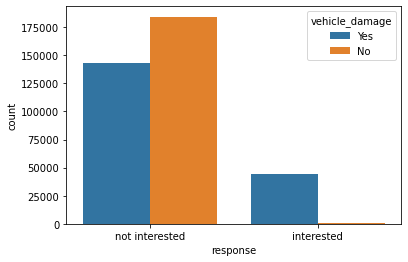

In [36]:
ax = sns.countplot(data = train, x = 'response', hue = 'vehicle_damage')
ax.set_xticklabels(['not interested', 'interested'])

Das pessoas que estão interessadas no seguro, grande parte já teve algum sinistro em seu veículo.

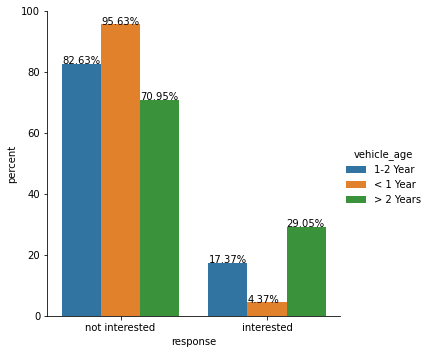

In [37]:
 x,y = 'response', 'vehicle_age'

df1 = train.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.set_xticklabels(['not interested', 'interested'])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Em relação ao interesse no seguro com a idade dos carros, percentualmente aqueles que tem mais interesse em comparação com os que não tem, são aqueles que tem os veículos com mais de dois anos

[Text(0, 0, 'not interested'), Text(1, 0, 'interested')]

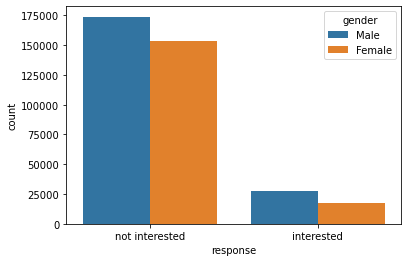

In [38]:
ax = sns.countplot(data = train, x = 'response', hue = 'gender')
ax.set_xticklabels(['not interested', 'interested'])

Há mais homens interessados no seguro dos que mulheres

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

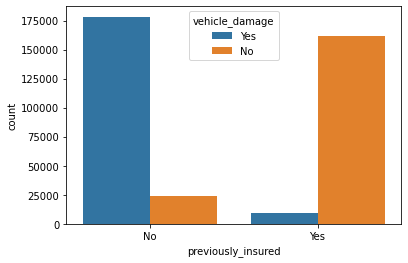

In [39]:
ax = sns.countplot(data = train, x = 'previously_insured', hue = 'vehicle_damage')
ax.set_xticklabels(['No', 'Yes'])

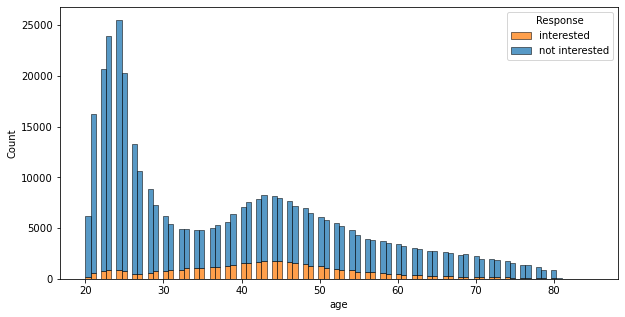

In [85]:
plt.subplots(figsize=(10,5))   
sns.histplot(data = train, x = 'age', hue = 'response', multiple="stack")
plt.legend(title = "Response", labels=['interested', 'not interested'])

Pessoas de 20 a 30 anos tendem a ter menos interesse pelo seguro de carro. Dos 30 aos 50 anos esse interesse aumenta.

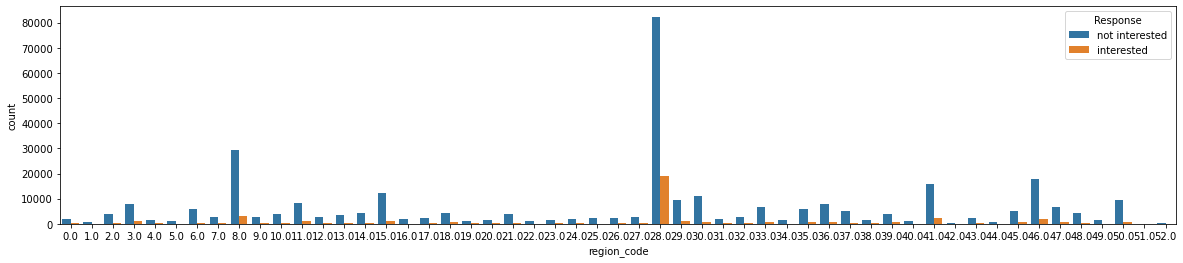

In [40]:
plt.subplots(figsize=(20,4))   
sns.countplot(data = train, x = 'region_code', hue='response')
plt.legend(title = "Response", labels=['not interested', 'interested'])

A região 28 por ser uma região que possuem mais pessoas com plano de saúde, provalmente também é uma região mais populosa e esparava-se que teriam mais pessoas interessadas em um seguro de carros, mas não é o que acontece.

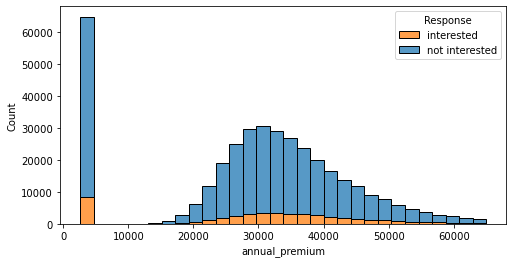

In [70]:
plt.subplots(figsize=(8,4))   
sns.histplot(data = train, x = 'annual_premium', hue = 'response', bins=30, multiple="stack")
plt.legend(title = "Response", labels=['interested', 'not interested'])

- Não nota-se uma relação de quanto a pessoa paga pelo seguro de saúde com o interesse da mesma em ter um seguro de carro, o gráfico segue uma normal para as duas.

### Resumo

Interessados:
- Não tiveram seguro previamente
- Já tiveram algum sinistro no veículo
- Veículos com mais de 2 anos
- Pessoas de 30 a 50 anos

### Mais análises

- Policy Sales Channel
- Região com maior número de pessoas
- Idades com a menor diferença entre interessados e não interessados